# Support Vector Machines (SVM) on several 2D data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
mat = loadmat("/content/drive/My Drive/svc_datasets/ex6data1.mat")
X = mat["X"]
y = mat["y"]
X[:5],y[:5]

(array([[1.9643, 4.5957],
        [2.2753, 3.8589],
        [2.9781, 4.5651],
        [2.932 , 3.5519],
        [3.5772, 2.856 ]]), array([[1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8))

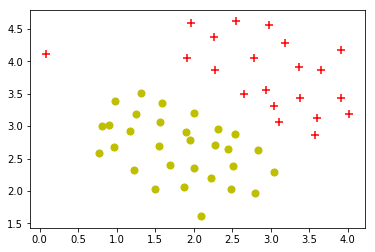

In [0]:
m,n = X.shape[0],X.shape[1]
pos,neg= (y==1).reshape(m,1), (y==0).reshape(m,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

2.268779509803921 0.9193831036711171
3.1325117647058827 0.7458350213534344


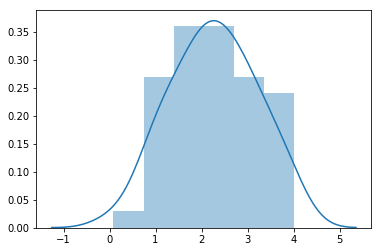

In [0]:
print(np.mean(X[:,0]),np.std(X[:,0]))
print(np.mean(X[:,1]),np.std(X[:,1]))
sns.distplot(X[:,0])

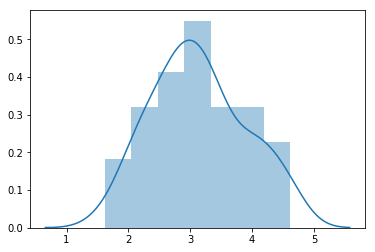

In [0]:
sns.distplot(X[:,1])

## SVM with Linear kernels - linear - C = 1.0 (default )
**Dataset 1**

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X,np.ravel(y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

(1.5, 5)

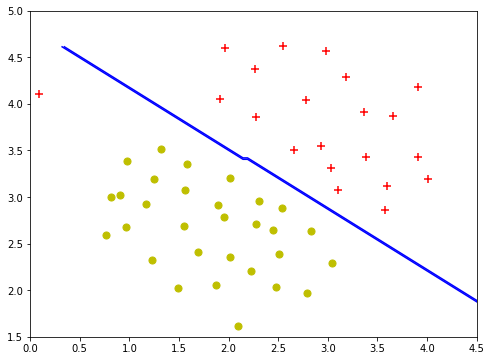

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

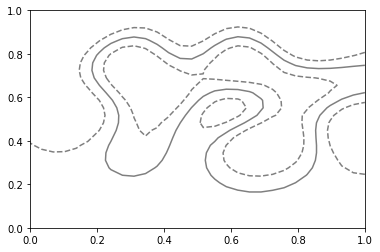

In [0]:
plot_svc_decision_function(classifier3)

In [0]:
pred = classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T)
pred[:5]

array([0, 0, 0, 0, 0], dtype=uint8)

## SVM with Linear kernels - linear - C = 100 -> Overfits

In [0]:
# Test C = 100
classifier2 = SVC(C=100,kernel="linear")
classifier2.fit(X,np.ravel(y))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

(1.5, 5)

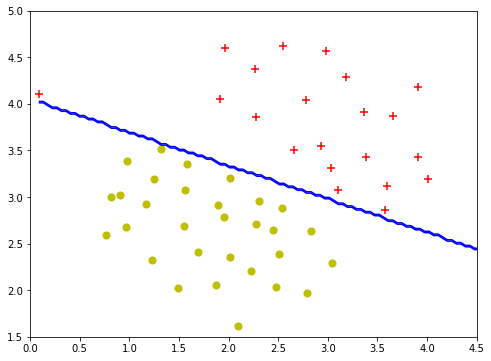

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_3,X_4 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_3,X_4,classifier2.predict(np.array([X_3.ravel(),X_4.ravel()]).T).reshape(X_3.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

In [0]:
pred2 = classifier2.predict(np.array([X_1.ravel(),X_2.ravel()]).T)
pred[:5]

array([0, 0, 0, 0, 0], dtype=uint8)

## SVM with gaussian kernels - rbf
**Dataset 2**

In [0]:
mat2 = loadmat("/content/drive/My Drive/svc_datasets/ex6data2.mat")
X2 = mat2["X"]
y2 = mat2["y"]
X2[:5],y2[:5]

(array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        [0.15553  , 0.784357 ],
        [0.210829 , 0.866228 ]]), array([[1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8))

(0.4, 1)

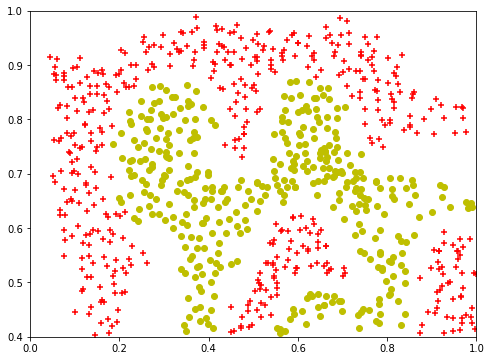

In [0]:
m2,n2 = X2.shape[0],X2.shape[1]
pos2,neg2= (y2==1).reshape(m2,1), (y2==0).reshape(m2,1)
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")
plt.xlim(0,1)
plt.ylim(0.4,1)

In [0]:
classifier3 = SVC(kernel="rbf",gamma=30)
classifier3.fit(X2,y2.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

(0.4, 1)

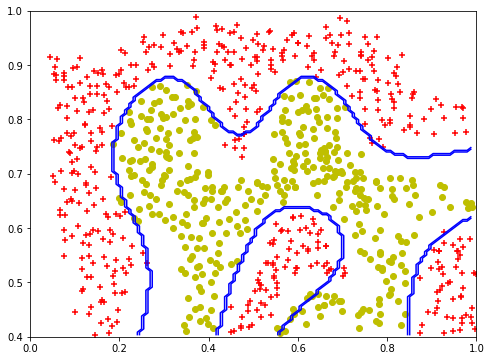

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")


# plotting the decision boundary
X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_5,X_6,classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape),1,colors="b")
plt.xlim(0,1)
plt.ylim(0.4,1)

In [0]:
pred_2=classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T)
pred_2[:5]

array([1, 1, 1, 1, 1], dtype=uint8)

## SVM - cross-validation
**Dataset 3**

In [0]:
mat3 = loadmat("/content/drive/My Drive/svc_datasets/ex6data3.mat")
X3 = mat3["X"]
y3 = mat3["y"]
Xval = mat3["Xval"]
yval = mat3["yval"]
X3[:5],y3[:5],Xval[:5],yval[:5]

(array([[-0.158986,  0.423977],
        [-0.347926,  0.47076 ],
        [-0.504608,  0.353801],
        [-0.596774,  0.114035],
        [-0.518433, -0.172515]]), array([[1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8), array([[-0.35306235, -0.67390181],
        [-0.2271258 ,  0.44731976],
        [ 0.09289767, -0.75352419],
        [ 0.14824252, -0.71847308],
        [-0.00151249,  0.16292786]]), array([[0],
        [1],
        [0],
        [0],
        [0]], dtype=uint8))

-0.13024550586729858 0.2000407316275131
-0.05974334767772512 0.314003794332101
-0.087344187606561 0.2271751143681597
-0.10236569254993044 0.39884535128236237


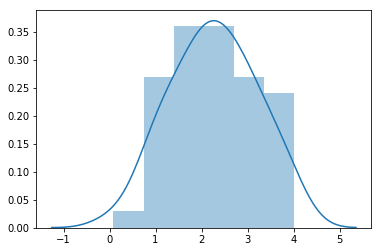

In [0]:
print(np.mean(X3[:,0]),np.std(X3[:,0]))
print(np.mean(X3[:,1]),np.std(X3[:,1]))
print(np.mean(Xval[:,0]),np.std(Xval[:,0]))
print(np.mean(Xval[:,1]),np.std(Xval[:,1]))
sns.distplot(X[:,0])

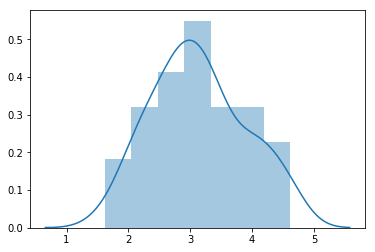

In [0]:
sns.distplot(X[:,1])

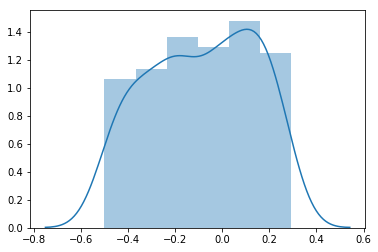

In [0]:
sns.distplot(Xval[:,0])

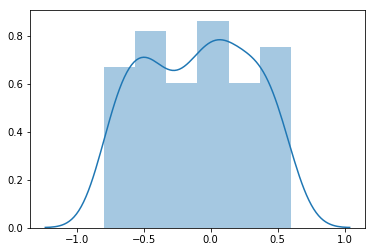

In [0]:
sns.distplot(Xval[:,1])

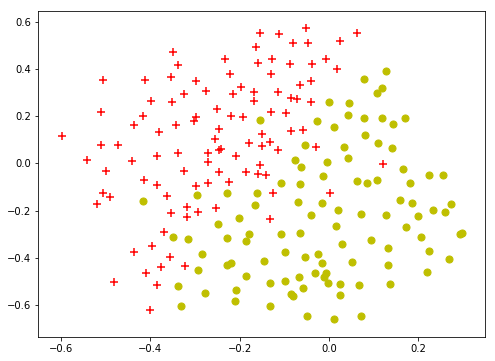

In [0]:
m3,n3 = X3.shape[0],X3.shape[1]
pos3,neg3= (y3==1).reshape(m3,1), (y3==0).reshape(m3,1)
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)

**Hyperparameter tuning**

In [0]:
def dataset3Params(X, y, Xval, yval,vals):
    """
    Returns your choice of C and sigma. You should complete this function to return the optimal C and 
    sigma based on a cross-validation set.
    """
    acc = 0
    best_c=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_c =C
                best_gamma=gamma
    return best_c, best_gamma

In [0]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = dataset3Params(X3, y3.ravel(), Xval, yval.ravel(),vals)
classifier4 = SVC(C=C,gamma=gamma)
classifier4.fit(X3,y3.ravel())

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
print("X",X3[:5])# get support vectors
print("support_vectors_",classifier4.support_vectors_[:5])


# get indices of support vectors
print(classifier4.support_[:5])

# get number of support vectors for each class
print(classifier4.n_support_[:5])

X [[-0.158986  0.423977]
 [-0.347926  0.47076 ]
 [-0.504608  0.353801]
 [-0.596774  0.114035]
 [-0.518433 -0.172515]]
support_vectors_ [[-0.0391705 -0.219298 ]
 [-0.108295  -0.30117  ]
 [-0.218894  -0.423977 ]
 [-0.0806452 -0.564327 ]
 [ 0.0668203 -0.517544 ]]
[20 21 23 24 25]
[90 88]


In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

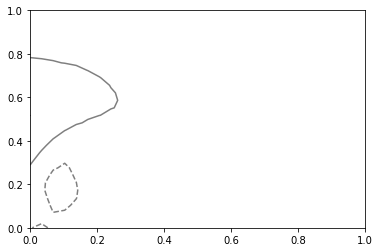

In [0]:
plot_svc_decision_function(classifier4)

In [0]:
print(classifier4.score(X3,y3))
print(classifier4.score(Xval,yval))

0.95260663507109
0.965


In [0]:
len(classifier4.support_vectors_[:,0])
len(classifier4.support_vectors_[:,1])

178

In [0]:
classifier4.n_support_ 
print(len(classifier4.support_))

178


In [0]:
dec = classifier4.decision_function([[0]])
dec

ValueError: ignored

(-0.7, 0.5)

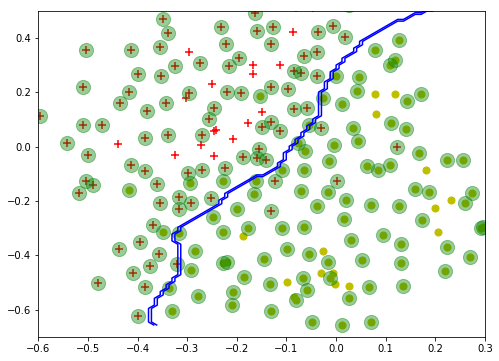

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)
#plotting Support Vectors
plt.scatter(classifier4.support_vectors_[:,0],classifier4.support_vectors_[:,1],c="g",marker="o",s=200,alpha=0.4)
# plotting the decision boundary
X_7,X_8 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
plt.contour(X_7,X_8,classifier4.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape),1,colors="b")
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)

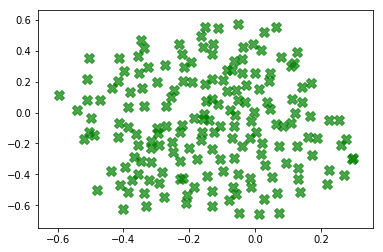

In [0]:
plt.scatter(classifier4.support_vectors_[:,0],classifier4.support_vectors_[:,1],c="g",marker="X",s=100,alpha=0.7)

(-0.7, 0.5)

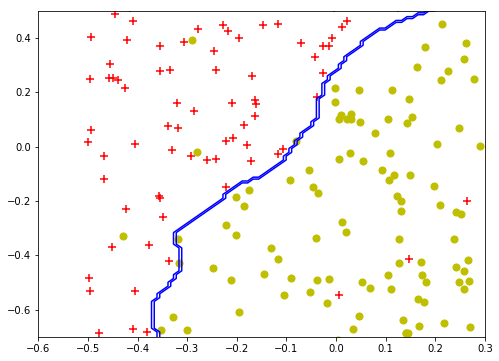

In [0]:
m4,n4 = Xval.shape[0],Xval.shape[1]
pos4,neg4= (yval==1).reshape(m4,1), (yval==0).reshape(m4,1)

plt.figure(figsize=(8,6))
plt.scatter(Xval[pos4[:,0],0],Xval[pos4[:,0],1],c="r",marker="+",s=50)
plt.scatter(Xval[neg4[:,0],0],Xval[neg4[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_9,X_10 = np.meshgrid(np.linspace(Xval[:,0].min(),Xval[:,1].max(),num=100),np.linspace(Xval[:,1].min(),Xval[:,1].max(),num=100))
plt.contour(X_9,X_10,classifier4.predict(np.array([X_9.ravel(),X_10.ravel()]).T).reshape(X_9.shape),1,colors="b")
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)

In [0]:
classifier4.score(Xval,yval)

0.965

In [0]:
parameters = {'C':[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30,100],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['auto','scale',100]}
from sklearn.model_selection import GridSearchCV
#LR_1 = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
svc_gcv = SVC()
cv_ = GridSearchCV(svc_gcv,parameters, cv = 5)
cv_.fit(X3,y3.ravel())
print(cv_.best_estimator_)
print(cv_.best_params_)
print(cv_.score(Xval,yval))
print(cv_.score(X3,y3.ravel()))

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
{'C': 3, 'gamma': 'scale', 'kernel': 'rbf'}
0.95
0.943127962085308


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(-0.7, 0.5)

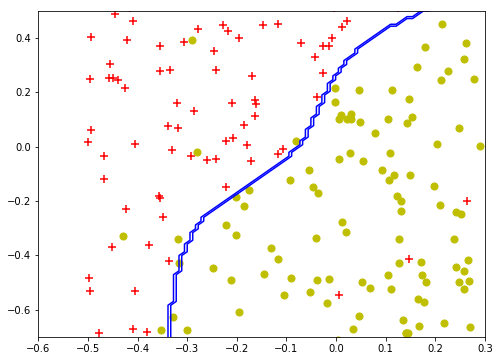

In [0]:
m4,n4 = Xval.shape[0],Xval.shape[1]
pos4,neg4= (yval==1).reshape(m4,1), (yval==0).reshape(m4,1)

plt.figure(figsize=(8,6))
plt.scatter(Xval[pos4[:,0],0],Xval[pos4[:,0],1],c="r",marker="+",s=50)
plt.scatter(Xval[neg4[:,0],0],Xval[neg4[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_9,X_10 = np.meshgrid(np.linspace(Xval[:,0].min(),Xval[:,1].max(),num=100),np.linspace(Xval[:,1].min(),Xval[:,1].max(),num=100))
plt.contour(X_9,X_10,cv_.predict(np.array([X_9.ravel(),X_10.ravel()]).T).reshape(X_9.shape),1,colors="b")
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100,solver = 'newton-cg')
lr.fit(X3,y3.ravel())
lr.score(Xval,yval)

0.935

In [0]:
parameters = {'C':[0.01,0.1,1,10],'solver':['newton-cg', 'lbfgs',  'sag', 'saga'],'penalty' : ['l2' ,'none']}
from sklearn.model_selection import GridSearchCV
#LR_1 = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
LR_1 = LogisticRegression()
cv = GridSearchCV(LR_1,parameters, cv = 5)
cv.fit(X3,y3.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_r

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
cv.score(Xval,yval)

0.935

(-0.7, 0.5)

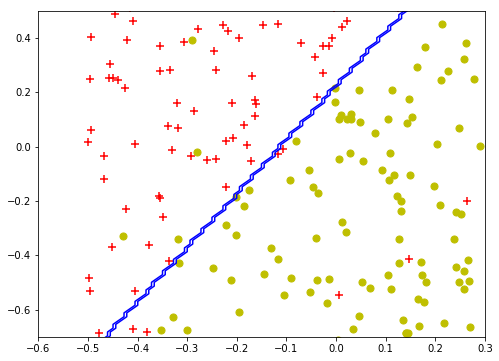

In [0]:
m4,n4 = Xval.shape[0],Xval.shape[1]
pos4,neg4= (yval==1).reshape(m4,1), (yval==0).reshape(m4,1)

plt.figure(figsize=(8,6))
plt.scatter(Xval[pos4[:,0],0],Xval[pos4[:,0],1],c="r",marker="+",s=50)
plt.scatter(Xval[neg4[:,0],0],Xval[neg4[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_9,X_10 = np.meshgrid(np.linspace(Xval[:,0].min(),Xval[:,1].max(),num=100),np.linspace(Xval[:,1].min(),Xval[:,1].max(),num=100))
plt.contour(X_9,X_10,cv.predict(np.array([X_9.ravel(),X_10.ravel()]).T).reshape(X_9.shape),1,colors="b")
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)

# SVM on emails datasets to classify spam emails.

In [0]:
import re
from nltk.stem import PorterStemmer

file_contents = open("/content/drive/My Drive/svc_datasets/emailSample1.txt","r").read()
vocabList = open("/content/drive/My Drive/svc_datasets/vocab.txt","r").read()

In [0]:
vocabList=vocabList.split("\n")[:-1]

vocabList_d={}
for ea in vocabList:
    value,key = ea.split("\t")[:]
    vocabList_d[key] = value

In [0]:
file_contents


"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

**Preprocessing emails**

In [0]:
def processEmail(email_contents,vocabList_d):
    """
    Preprocesses the body of an email and returns a list of indices of the words contained in the email. 
    """
    # Lower case
    email_contents = email_contents.lower()
    
    # Handle numbers
    email_contents = re.sub("[0-9]+","number",email_contents)
    
    # Handle URLS
    email_contents = re.sub("[http|https]://[^\s]*","httpaddr",email_contents)
    
    # Handle Email Addresses
    email_contents = re.sub("[^\s]+@[^\s]+","emailaddr",email_contents)
    
    # Handle $ sign
    email_contents = re.sub("[$]+","dollar",email_contents)
    
    # Strip all special characters
    specialChar = ["<","[","^",">","+","?","!","'",".",",",":"]
    for char in specialChar:
        email_contents = email_contents.replace(str(char),"")
    email_contents = email_contents.replace("\n"," ")    
    
    # Stem the word
    ps = PorterStemmer()
    email_contents = [ps.stem(token) for token in email_contents.split(" ")]
    email_contents= " ".join(email_contents)
    
    # Process the email and return word_indices
    
    word_indices=[]
    
    for char in email_contents.split():
        if len(char) >1 and char in vocabList_d:
            word_indices.append(int(vocabList_d[char]))
    
    return word_indices

In [0]:
word_indices= processEmail(file_contents,vocabList_d)
word_indices[:5]

[86, 916, 794, 1077, 883]

**Extracting features from emails**

In [0]:
def emailFeatures(word_indices, vocabList_d):
    """
    Takes in a word_indices vector and  produces a feature vector from the word indices. 
    """
    n = len(vocabList_d)
    
    features = np.zeros((n,1))
    
    for i in word_indices:
        features[i] =1
        
    return features

In [0]:
features = emailFeatures(word_indices,vocabList_d)
print("Length of feature vector: ",len(features))
print("Number of non-zero entries: ",np.sum(features))

Length of feature vector:  1899
Number of non-zero entries:  43.0


**Training SVM for spam classification**

In [0]:
spam_mat = loadmat("/content/drive/My Drive/svc_datasets/spamTrain.mat")
X_train =spam_mat["X"]
y_train = spam_mat["y"]

In [0]:
C =0.1
spam_svc = SVC(C=0.1,kernel ="linear")
spam_svc.fit(X_train,y_train.ravel())
print("Training Accuracy:",(spam_svc.score(X_train,y_train.ravel()))*100,"%")

Training Accuracy: 99.825 %


In [0]:
spam_mat_test = loadmat("/content/drive/My Drive/svc_datasets/spamTest.mat")
X_test = spam_mat_test["Xtest"]
y_test =spam_mat_test["ytest"]

In [0]:
spam_svc.predict(X_test)
print("Test Accuracy:",(spam_svc.score(X_test,y_test.ravel()))*100,"%")

Test Accuracy: 98.9 %


**Top predictors for spam**

In [0]:
weights = spam_svc.coef_[0]
weights_col = np.hstack((np.arange(1,1900).reshape(1899,1),weights.reshape(1899,1)))
df = pd.DataFrame(weights_col)

df.sort_values(by=[1],ascending = False,inplace=True)

predictors = []
idx=[]
for i in df[0][:15]:
    for keys, values in vocabList_d.items():
        if str(int(i)) == values:
            predictors.append(keys)
            idx.append(int(values))

In [0]:
print("Top predictors of spam:")

for _ in range(15):
    print(predictors[_],"\t\t",round(df[1][idx[_]-1],6))

Top predictors of spam:
our 		 0.500614
click 		 0.465916
remov 		 0.422869
guarante 		 0.383622
visit 		 0.36771
basenumb 		 0.345064
dollar 		 0.323632
will 		 0.269724
price 		 0.267298
pleas 		 0.261169
most 		 0.257298
nbsp 		 0.253941
lo 		 0.253467
ga 		 0.248297
hour 		 0.246404
